Running free particle simulation...


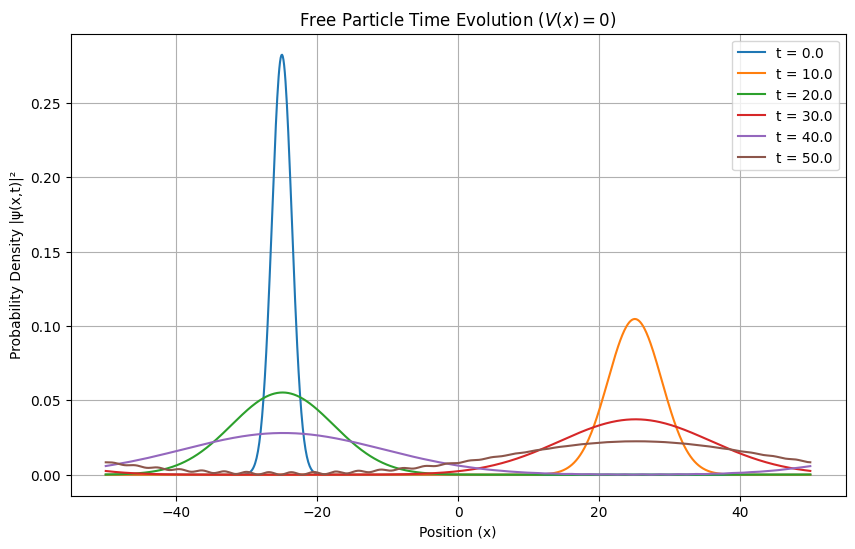

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Running free particle simulation...")

## 1. SETUP: Define Constants and Grids

hbar = 1.0  # Planck's constant (reduced)
m = 1.0     # Mass of the particle

# Grid parameters
N = 1024                # Number of grid points (power of 2 is good for FFT)
L = 100.0               # Length of the 1D "box"
dx = L / N              # Spatial step
x = np.linspace(-L/2, L/2, N) # Spatial grid [cite: 32]

# Momentum grid
# [cite_start]'fftfreq' generates the correct frequency bins for the FFT [cite: 33]
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Time parameters
dt = 0.05               # Time step
n_steps = 1000          # Total number of steps
plot_every = 200        # How often to save a plot (e.g., every 200 steps)

## 2. DEFINE: Initial State and Potential

# Initial wave packet parameters
x0 = -L / 4             # Initial position
k0 = 5.0                # Initial momentum
sigma = 2.0             # Width of the wave packet

# [cite_start]Define the initial wave packet using the given formula [cite: 21, 34]
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)

# [cite_start]Normalize the wave packet [cite: 34]
norm = np.sum(np.abs(psi0)**2) * dx
psi = psi0 / np.sqrt(norm)

# Define the potential V(x)
# [cite_start]For the free particle, V(x) = 0 everywhere [cite: 22, 35]
V = np.zeros(N)

## 3. PRE-CALCULATE: Evolution Operators

# [cite_start]Potential evolution operator (half step) [cite: 41]
V_op = np.exp(-1j * V * dt / (2 * hbar))

# [cite_start]Kinetic evolution operator (full step) [cite: 42]
T_op = np.exp(-1j * hbar * k**2 * dt / (2 * m))

## 4. RUN: Time Evolution Loop

# Setup plot
plt.figure(figsize=(10, 6))
plt.title("Free Particle Time Evolution ($V(x)=0$)")
plt.xlabel("Position (x)")
plt.ylabel("Probability Density |ψ(x,t)|²")
plt.plot(x, np.abs(psi)**2, label=f"t = 0.0") # Plot initial state [cite: 9, 24, 50]

# [cite_start]Run the loop for the desired number of steps [cite: 45]
for step in range(1, n_steps + 1):
    
    # (a) [cite_start]First half potential step [cite: 46]
    psi = psi * V_op
    
    # (b) Full kinetic step:
    psi_k = np.fft.fft(psi)      # Go to momentum space [cite: 47]
    psi_k = psi_k * T_op         # Evolve in k-space [cite: 48]
    psi = np.fft.ifft(psi_k)     # Go back to position space [cite: 49]
    
    # (c) [cite_start]Second half potential step [cite: 50]
    psi = psi * V_op
    
    # (d) [cite_start]Save and plot periodically [cite: 50]
    if step % plot_every == 0:
        current_time = step * dt
        prob_density = np.abs(psi)**2
        plt.plot(x, prob_density, label=f"t = {current_time:.1f}")

## 5. VISUALIZE

plt.legend()
plt.grid(True)
plt.show()

Running free particle animation...


c:\Users\bhatn\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


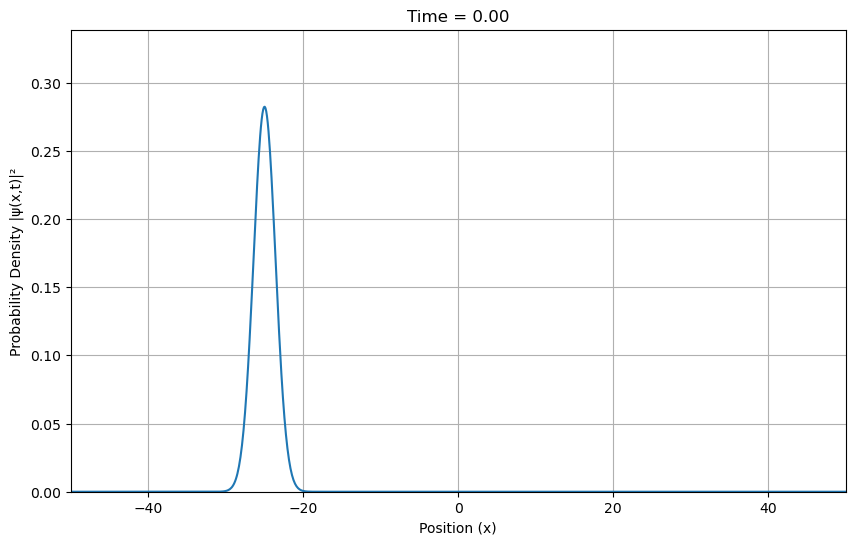

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation # Import the animation class

print("Running free particle animation...")

## 1. SETUP: Define Constants and Grids
hbar = 1.0
m = 1.0
N = 1024
L = 100.0
dx = L / N
x = np.linspace(-L/2, L/2, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
dt = 0.05
n_steps = 1000 # This will now be the number of frames

## 2. DEFINE: Initial State and Potential
x0 = - L / 4
k0 = 0
sigma = 2
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
norm = np.sum(np.abs(psi0)**2) * dx
psi = psi0 / np.sqrt(norm) # 'psi' will be our global state variable
V = np.zeros(N)

## 3. PRE-CALCULATE: Evolution Operators
V_op = np.exp(-1j * V * dt / (2 * hbar))
T_op = np.exp(-1j * hbar * k**2 * dt / (2 * m))

## 4. SETUP THE ANIMATION

# --- Set up the plot ---
# 'fig' and 'ax' are now global so 'update' can access them
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the initial state (t=0)
# 'line,' gets the Line2D object, which we will update
line, = ax.plot(x, np.abs(psi)**2)

# Set plot limits and labels
ax.set_ylim(0, np.max(np.abs(psi)**2) * 1.2) # Set a fixed y-limit
ax.set_xlim(x[0], x[-1])
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density |ψ(x,t)|²")
ax.grid(True)
# Add a title that we can update
title = ax.set_title(f"Time = 0.00")

# --- Define the update function ---
# This function runs for every frame
def update(frame):
    global psi # Tell the function to use the global 'psi' variable
    
    # Run one step of the simulation
    # (a) First half potential step
    psi = psi * V_op
    
    # (b) Full kinetic step
    psi_k = np.fft.fft(psi)
    psi_k = psi_k * T_op
    psi = np.fft.ifft(psi_k)
    
    # (c) Second half potential step
    psi = psi * V_op
    
    # (d) Update the plot data
    prob_density = np.abs(psi)**2
    line.set_ydata(prob_density)
    
    # Update the title
    current_time = frame * dt
    title.set_text(f"Time = {current_time:.2f}")
    
    return line, title # Return the objects that were changed

## 5. RUN THE ANIMATION

# Create the animation
# 'frames' is the number of times to call 'update'
# 'blit=True' means it only redraws the parts that changed (faster)
ani = FuncAnimation(fig, update, frames=n_steps, blit=False)

# Show the plot
plt.show()

Running potential barrier simulation (snapshot plot)...


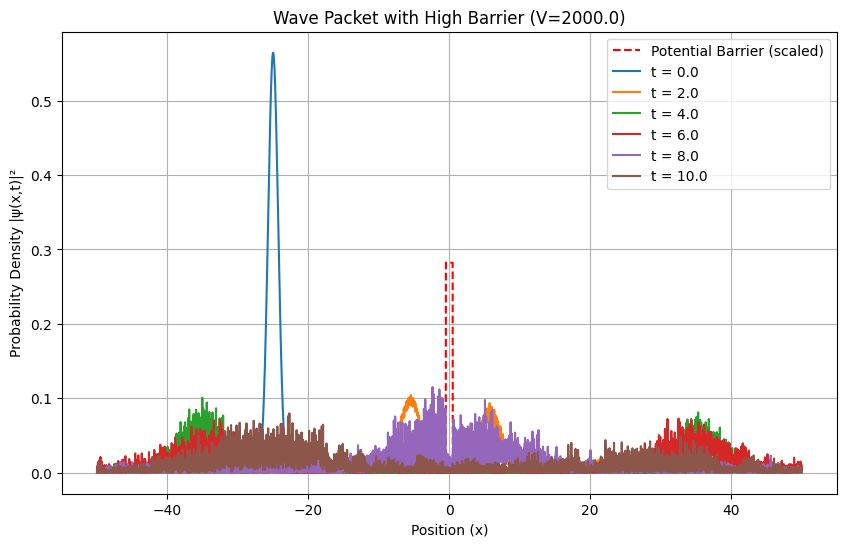

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("Running potential barrier simulation (snapshot plot)...")

## 1. SETUP: Define Constants and Grids
hbar = 1.0
m = 1.0

# --- Parameters for numerical stability ---
# We need high resolution for the stiff potential
N = 4096                # Increased grid points
dt = 0.005              # Decreased time step
# ------------------------------------------

L = 100.0
dx = L / N
x = np.linspace(-L/2, L/2, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

n_steps = 2000          # Total number of steps
plot_every = 400        # How often to plot a snapshot

## 2. DEFINE: Initial State and Potential

# Initial wave packet parameters
x0 = -L / 4             # Initial position
k0 = 15.0               # Initial momentum
sigma = 1.0             # Width of the wave packet

# Define the initial wave packet
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
norm = np.sum(np.abs(psi0)**2) * dx
psi = psi0 / np.sqrt(norm)

# Define the potential V(x)
V = np.zeros(N)
barrier_height = 2000.0
barrier_width = 1.0
barrier_center = 0.0

# Create the barrier
V[ (x > barrier_center - barrier_width/2) & (x < barrier_center + barrier_width/2) ] = barrier_height


## 3. PRE-CALCULATE: Evolution Operators

# Potential evolution operator (half step)
V_op = np.exp(-1j * V * dt / (2 * hbar))

# Kinetic evolution operator (full step)
T_op = np.exp(-1j * hbar * k**2 * dt / (2 * m))


## 4. SETUP PLOT
plt.figure(figsize=(10, 6))
plt.title(f"Wave Packet with High Barrier (V={barrier_height})")
plt.xlabel("Position (x)")
plt.ylabel("Probability Density |ψ(x,t)|²")

# Plot the potential barrier shape for reference
# (Scaled to fit on the plot)
max_prob = np.max(np.abs(psi)**2)
plt.plot(x, V / barrier_height * max_prob * 0.5, 'r--', label="Potential Barrier (scaled)")

# Plot the initial state
plt.plot(x, np.abs(psi)**2, label=f"t = 0.0")

## 5. RUN: Time Evolution Loop

for step in range(1, n_steps + 1):
    
    # (a) First half potential step
    psi = psi * V_op
    
    # (b) Full kinetic step
    psi_k = np.fft.fft(psi)
    psi_k = psi_k * T_op
    psi = np.fft.ifft(psi_k)
    
    # (c) Second half potential step
    psi = psi * V_op
    
    # (d) Save and plot
    if step % plot_every == 0:
        current_time = step * dt
        prob_density = np.abs(psi)**2
        plt.plot(x, prob_density, label=f"t = {current_time:.1f}")

## 6. VISUALIZE

plt.legend()
plt.grid(True)
plt.show()

Running potential barrier simulation...


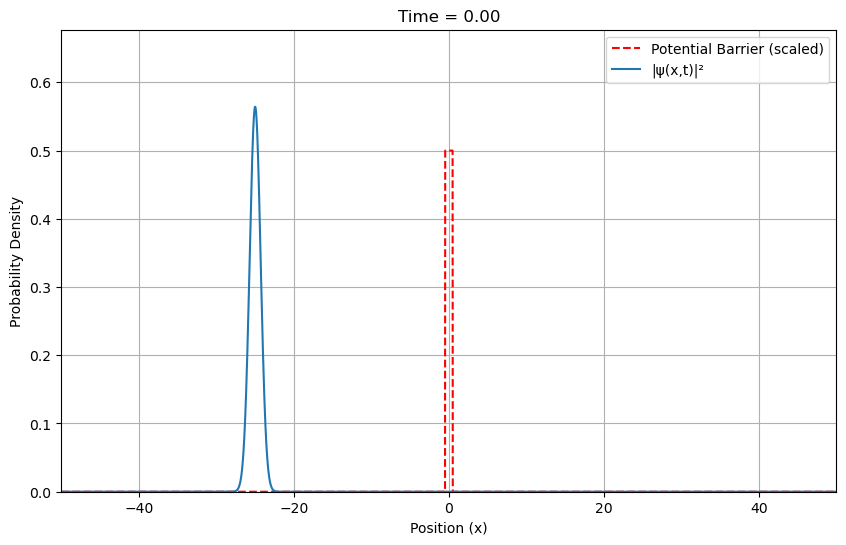

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Use this if you are in Jupyter to embed the video
from IPython.display import HTML

print("Running potential barrier simulation...")

## 1. SETUP: Define Constants and Grids
hbar = 1.0
m = 1.0
N = 4096
L = 100.0
dx = L / N
x = np.linspace(-L/2, L/2, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
dt = 0.01
n_steps = 1000

## 2. DEFINE: Initial State and Potential

# Initial wave packet parameters
x0 = -L / 4             # Initial position
k0 = 10                # Initial momentum
sigma = 1            # Width of the wave packet

# Define the initial wave packet
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
norm = np.sum(np.abs(psi0)**2) * dx
psi = psi0 / np.sqrt(norm)

# --- NEW: Define the Potential V(x) ---
V = np.zeros(N)
barrier_height = 2000.0
barrier_width = 1.0
barrier_center = 0.0

# Create the barrier
V[ (x > barrier_center - barrier_width/2) & (x < barrier_center + barrier_width/2) ] = barrier_height


## 3. PRE-CALCULATE: Evolution Operators

# --- NEW: Recalculate V_op with the new V ---
V_op = np.exp(-1j * V * dt / (2 * hbar))

# Kinetic operator is unchanged
T_op = np.exp(-1j * hbar * k**2 * dt / (2 * m))


## 4. SETUP THE ANIMATION PLOT

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the potential barrier (scaled to fit)
# This gives a visual reference
ax.plot(x, V / barrier_height * 0.5, 'r--', label="Potential Barrier (scaled)")

# Plot the initial state
line, = ax.plot(x, np.abs(psi)**2, label="|ψ(x,t)|²")

# Set plot limits and labels
ax.set_ylim(0, np.max(np.abs(psi)**2) * 1.2)
ax.set_xlim(x[0], x[-1])
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density")
ax.grid(True)
title = ax.set_title(f"Time = 0.00")
ax.legend()

# --- Define the update function ---
# This is identical to the free particle case
def update(frame):
    global psi 
    
    psi = psi * V_op
    psi_k = np.fft.fft(psi)
    psi_k = psi_k * T_op
    psi = np.fft.ifft(psi_k)
    psi = psi * V_op
    
    prob_density = np.abs(psi)**2
    line.set_ydata(prob_density)
    
    current_time = frame * dt
    title.set_text(f"Time = {current_time:.2f}")
    
    return line, title 

## 5. RUN THE ANIMATION

# Create the animation object
ani = FuncAnimation(fig, update, frames=n_steps, blit=False)

# To display in Jupyter Notebook:
# print("Rendering animation...")
# plt.close(fig) # Close the static plot
# video_html = ani.to_html5_video()
# HTML(video_html)

# To display by running as a .py file:
plt.show()